In [44]:
# !pip install -r requirements.txt
# !pip install nbformat

In [45]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
plt.style.use('ggplot')

from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt

In [46]:
df = pd.read_csv('AAPL.csv')

#We do not need the following columns:
df = df.drop(columns = ['Open','Close','High', 'Low', 'Volume'])
df

,Date,Adj Close
0,2022-09-12,162.466187
1,2022-09-13,152.932739
2,2022-09-14,154.394073
3,2022-09-15,151.471405
4,2022-09-16,149.811264
...,...,...
246,2023-09-05,189.699997
247,2023-09-06,182.910004
248,2023-09-07,177.559998
249,2023-09-08,178.179993


In [47]:
# A graph of date vs price:
fig = px.line(df, x = 'Date', y = 'Adj Close')
fig.show()

In [48]:
df = df.set_index('Date')

In [49]:
df.shape

(251, 1)

In [50]:
#We are going to use 50 out of the 251 data points, approx 20%
train = df.iloc[:-50]
test = df.iloc[-50:]

In [51]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 2022-09-12 to 2023-06-29
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  201 non-null    float64
dtypes: float64(1)
memory usage: 3.1+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 2023-06-30 to 2023-09-11
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  50 non-null     float64
dtypes: float64(1)
memory usage: 800.0+ bytes


In [52]:
train.index = pd.to_datetime(train.index)
test.index = pd.to_datetime(test.index)

In [53]:
model = SimpleExpSmoothing(np.asarray(train['Adj Close']))
model.index = pd.to_datetime(train.index)

In [54]:
#smoothing level determines how much weight is given to older data points
fit1 = model.fit(smoothing_level = .3)
pred1 = fit1.forecast(50)

fit2 = model.fit(smoothing_level = .2)
pred2 = fit2.forecast(50)

fit3 = model.fit(smoothing_level = .5)
pred3 = fit3.forecast(50)


c:\Users\13478\Desktop\Stock_Pricing_Predictions\.venv\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning:

Model has no free parameters to estimate. Set optimized=False to suppress this warning

c:\Users\13478\Desktop\Stock_Pricing_Predictions\.venv\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning:

Model has no free parameters to estimate. Set optimized=False to suppress this warning

c:\Users\13478\Desktop\Stock_Pricing_Predictions\.venv\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning:

Model has no free parameters to estimate. Set optimized=False to suppress this warning



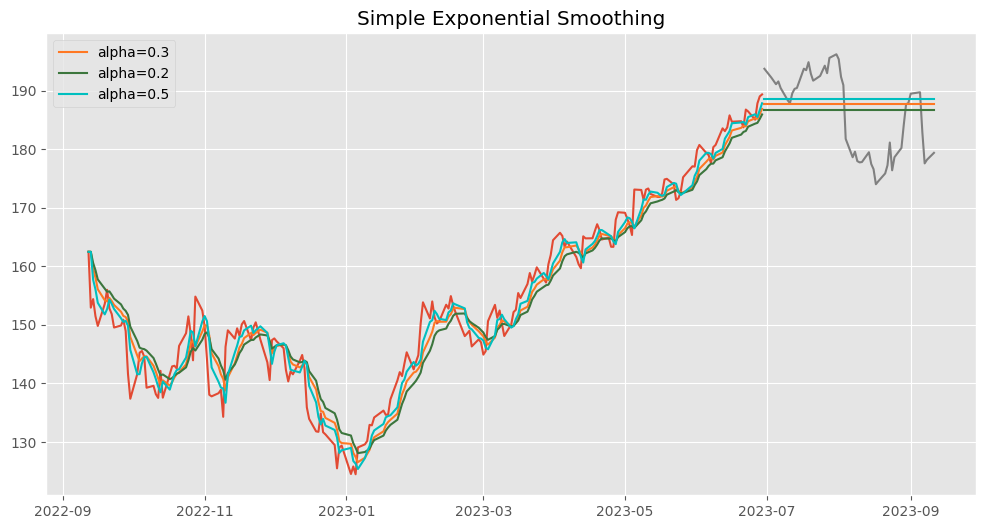

In [55]:
fig, ax = plt.subplots(figsize = (12,6))
ax.plot(train.index[:], train.values[:])
ax.plot(test.index, test.values, color = "gray")

for predicts, fits, colors in zip((pred1, pred2, pred3), (fit1, fit2, fit3), ('#ff7823', '#3c763d', 'c')):
    ax.plot(train.index[:], fits.fittedvalues[:], color = colors)
    ax.plot(test.index, predicts, label = "alpha=" + str(fits.params['smoothing_level'])[:3], color = colors)

plt.title("Simple Exponential Smoothing")
plt.legend();